In [6]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import shap

# sklearn 
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report

from pyod.models.ecod import ECOD
from yellowbrick.cluster import KElbowVisualizer

import lightgbm as lgb
import prince



In [7]:
rfm_df = pd.read_csv('datasets/rfm.csv')
rfm_df = rfm_df.loc[:, ['customer_id', 'RecencyScore', 'FrequencyScore', 'MonetaryScore']]
rfm_df

customer_id  RecencyScore  FrequencyScore  \
0      00012a2ce6f8dcda20d059ce98491703           3.0             1.0   
1      0001fd6190edaaf884bcaf3d49edf079           2.0             1.0   
2      0004164d20a9e969af783496f3408652           2.0             1.0   
3      00050bf6e01e69d5c0fd612f1bcfb69c           3.0             1.0   
4      00066ccbe787a588c52bd5ff404590e3           4.0             1.0   
...                                 ...           ...             ...   
40278  fff415b4c72e09483a25c15108c65d31           4.0             1.0   
40279  fff5169e583fd07fac9fec88962f189d           5.0             1.0   
40280  fff89c8ed4fcf69a823c1d149e429a0b           4.0             1.0   
40281  fffcb937e9dd47a13f05ecb8290f4d3e           4.0             1.0   
40282  ffff42319e9b2d713724ae527742af25           5.0             1.0   

       MonetaryScore  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                1.0  
...              ...  
40278            1.0  
40279            1.0  
40280            1.0  
40281            1.0  
40282            1.0  

[40283 rows x 4 columns]

In [8]:
rfm_df.describe()

RecencyScore  FrequencyScore  MonetaryScore
count  40283.000000    40283.000000   40283.000000
mean       3.781992        1.000819       1.001663
std        1.052722        0.039539       0.052938
min        1.000000        1.000000       1.000000
25%        3.000000        1.000000       1.000000
50%        4.000000        1.000000       1.000000
75%        5.000000        1.000000       1.000000
max        5.000000        5.000000       5.000000

In [9]:
# rfm_df.set_index('customer_id')

# from sklearn.preprocessing import MinMaxScaler

# rfm_df_scaled = rfm_df.copy()
# scaler = MinMaxScaler()
# rfm_df_scaled.iloc[:, 1:] = scaler.fit_transform(rfm_df.iloc[:, 1:])
# rfm_df_scaled

In [10]:
from sklearn.pipeline import Pipeline

# https://github.com/yzhao062/pyod
clf = ECOD()

clf.fit(rfm_df.iloc[:, 1:])
outliers = clf.predict(rfm_df.iloc[:, 1:])

rfm_df_scaled['outlier'] = outliers
rfm_df['outlier'] = outliers

rfm_scaled_no_outliers = rfm_df_scaled[rfm_df_scaled['outlier'] == 0]
rfm_scaled_no_outliers = rfm_scaled_no_outliers.drop('outlier', axis=1)

rfm_scaled_no_outliers

NameError: name 'rfm_df_scaled' is not defined

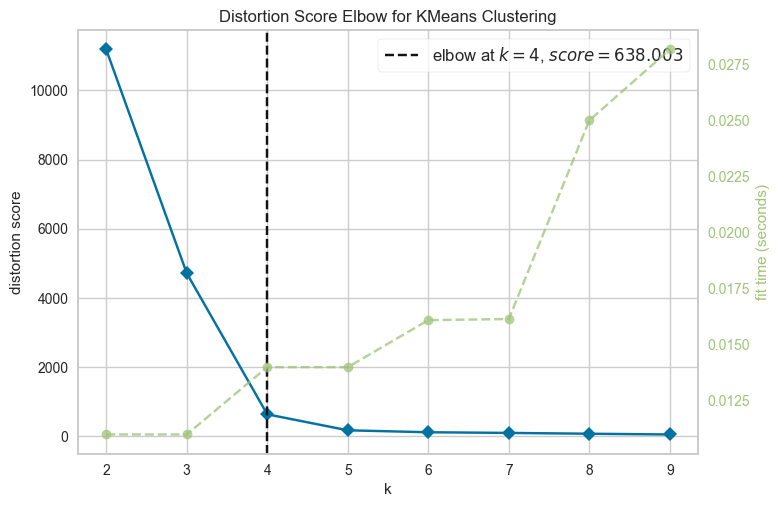

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(init='k-means++', random_state=0, n_init='auto')

visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(rfm_df.iloc[:, 1:])
visualizer.show()

In [ ]:
# def make_Silhouette_plot(X, n_clusters):
#     plt.xlim([-0.1, 1])
#     plt.ylim([0, len(X) + (n_clusters + 1) * 10])
#     clusterer = KMeans(n_clusters=n_clusters, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=10)
#     cluster_labels = clusterer.fit_predict(X)
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print(
#         "For n_clusters =", n_clusters,
#         "The average silhouette_score is :", silhouette_avg,
#     )
# # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)
#     y_lower = 10
#     for i in range(n_clusters):
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
#         ith_cluster_silhouette_values.sort()
#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i
#         color = cm.nipy_spectral(float(i) / n_clusters)
#         plt.fill_betweenx(
#             np.arange(y_lower, y_upper),
#             0,
#             ith_cluster_silhouette_values,
#             facecolor=color,
#             edgecolor=color,
#             alpha=0.7,
#         )
#         plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
#         y_lower = y_upper + 10
#         plt.title(f"The Silhouette Plot for n_cluster = {n_clusters}", fontsize=26)
#         plt.xlabel("The silhouette coefficient values", fontsize=24)
#         plt.ylabel("Cluster label", fontsize=24)
#         plt.axvline(x=silhouette_avg, color="red", linestyle="--")
#         plt.yticks([])  
#         plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
# range_n_clusters = list(range(2,10))
# for n_clusters in range_n_clusters:
#     print(f"N cluster: {n_clusters}")
#     make_Silhouette_plot(rfm_scaled_no_outliers.iloc[:, 1:], n_clusters)   
#     plt.savefig('Silhouette_plot_{}.png'.format(n_clusters))
#     plt.close()

In [ ]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=42)
clusters_predict = km.fit_predict(rfm_df.iloc[:, 1:])
print(km.inertia_)

638.0029485959228


In [ ]:
np.unique(clusters_predict)

array([0, 1, 2])

In [ ]:
rfm_scaled_no_outliers

customer_id   recency  frequency  monetary_value
0      00012a2ce6f8dcda20d059ce98491703  0.401099        0.0        0.007666
1      0001fd6190edaaf884bcaf3d49edf079  0.756868        0.0        0.013575
2      0004164d20a9e969af783496f3408652  0.699176        0.0        0.004521
3      00050bf6e01e69d5c0fd612f1bcfb69c  0.480769        0.0        0.005505
4      00066ccbe787a588c52bd5ff404590e3  0.285714        0.0        0.019037
...                                 ...       ...        ...             ...
40278  fff415b4c72e09483a25c15108c65d31  0.387363        0.0        0.005456
40279  fff5169e583fd07fac9fec88962f189d  0.156593        0.0        0.010451
40280  fff89c8ed4fcf69a823c1d149e429a0b  0.357143        0.0        0.002492
40281  fffcb937e9dd47a13f05ecb8290f4d3e  0.233516        0.0        0.005994
40282  ffff42319e9b2d713724ae527742af25  0.111264        0.0        0.014945

[36254 rows x 4 columns]

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(rfm_df.iloc[:, 1:],clusters_predict)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.
Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(rfm_df.iloc[:, 1:],clusters_predict)}")

"""
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method for determining an optimal value of k (see here for more).
Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
1 is the ideal value and indicates that clusters are very dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(rfm_df.iloc[:, 1:],clusters_predict)}")

Davies bouldin score: 0.10894658394232941
Calinski Score: 929723.3227915447
Silhouette Score: 0.9792759119102569


In [ ]:
rfm_scaled_no_outliers

customer_id   recency  frequency  monetary_value
0      00012a2ce6f8dcda20d059ce98491703  0.401099        0.0        0.007666
1      0001fd6190edaaf884bcaf3d49edf079  0.756868        0.0        0.013575
2      0004164d20a9e969af783496f3408652  0.699176        0.0        0.004521
3      00050bf6e01e69d5c0fd612f1bcfb69c  0.480769        0.0        0.005505
4      00066ccbe787a588c52bd5ff404590e3  0.285714        0.0        0.019037
...                                 ...       ...        ...             ...
40278  fff415b4c72e09483a25c15108c65d31  0.387363        0.0        0.005456
40279  fff5169e583fd07fac9fec88962f189d  0.156593        0.0        0.010451
40280  fff89c8ed4fcf69a823c1d149e429a0b  0.357143        0.0        0.002492
40281  fffcb937e9dd47a13f05ecb8290f4d3e  0.233516        0.0        0.005994
40282  ffff42319e9b2d713724ae527742af25  0.111264        0.0        0.014945

[36254 rows x 4 columns]

In [ ]:
def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()

    fig = px.scatter_3d(df, 
                        x=columns[0], 
                        y=columns[1], 
                        z=columns[2],
                        color='cluster',
                        template="plotly",
                        
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000, 
                                height = 800, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                      
    
    fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()


    fig = px.scatter(df, 
                        x=columns[0], 
                        y=columns[1],
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800, 
                                height = 700, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                        
        
    fig.show()


In [ ]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
clusters_predict = km.fit_predict(rfm_df.iloc[:, 1:])
print(km.inertia_)

4714.775374361124


In [ ]:
rfm_scaled_no_outliers

customer_id   recency  frequency  monetary_value
0      00012a2ce6f8dcda20d059ce98491703  0.401099        0.0        0.007666
1      0001fd6190edaaf884bcaf3d49edf079  0.756868        0.0        0.013575
2      0004164d20a9e969af783496f3408652  0.699176        0.0        0.004521
3      00050bf6e01e69d5c0fd612f1bcfb69c  0.480769        0.0        0.005505
4      00066ccbe787a588c52bd5ff404590e3  0.285714        0.0        0.019037
...                                 ...       ...        ...             ...
40278  fff415b4c72e09483a25c15108c65d31  0.387363        0.0        0.005456
40279  fff5169e583fd07fac9fec88962f189d  0.156593        0.0        0.010451
40280  fff89c8ed4fcf69a823c1d149e429a0b  0.357143        0.0        0.002492
40281  fffcb937e9dd47a13f05ecb8290f4d3e  0.233516        0.0        0.005994
40282  ffff42319e9b2d713724ae527742af25  0.111264        0.0        0.014945

[36254 rows x 4 columns]

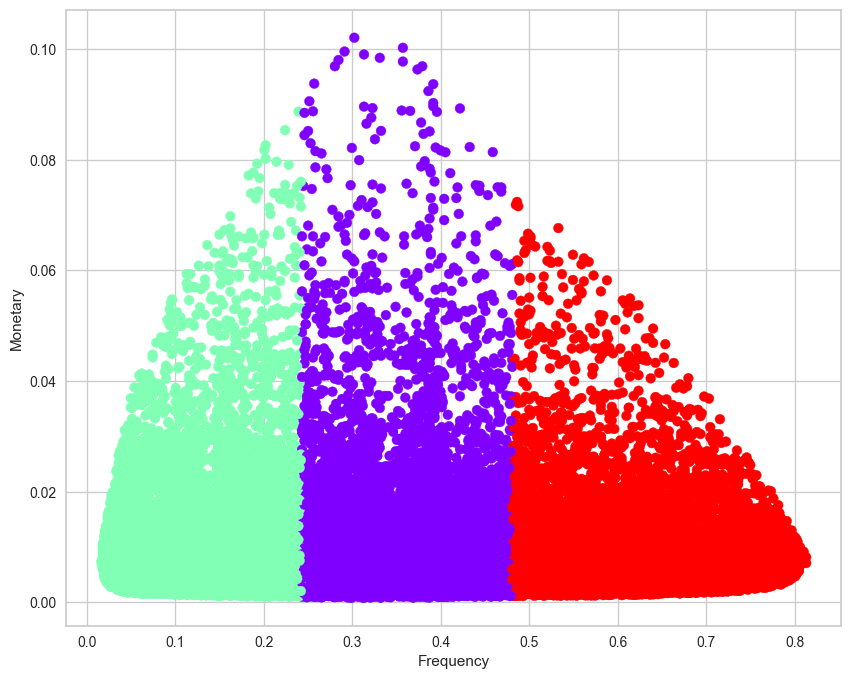

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(rfm_scaled_no_outliers.iloc[:, 1], rfm_scaled_no_outliers.iloc[:, 3], c=clusters_predict, cmap='rainbow')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [ ]:
pca_3d_object, df_pca_3d = get_pca_3d(rfm_df.iloc[:, 1:], clusters_predict)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)

The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              1.285        42.84%                     42.84%
1              0.999        33.29%                     76.14%
2              0.716        23.86%                    100.00%


In [ ]:
# plot the clusters in 3d using scikit-learn
from sklearn.calibration import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(rfm_scaled_no_outliers.iloc[:, 1:], clusters_predict)

rfm_scaled_no_outliers['cluster'] = clusters_predict
rfm_scaled_no_outliers['cluster'] = rfm_scaled_no_outliers['cluster'].astype('category')
rfm_scaled_no_outliers['cluster'] = rfm_scaled_no_outliers['cluster'].cat.rename_categories(['cluster_1', 'cluster_2', 'cluster_3'])

# convert categorical variable to numerical
le = LabelEncoder()
rfm_scaled_no_outliers['cluster'] = le.fit_transform(rfm_scaled_no_outliers['cluster'])
rfm_scaled_no_outliers['cluster'] = rfm_scaled_no_outliers['cluster'].cat.codes

# plot it
fig = px.scatter_3d(rfm_scaled_no_outliers, 
                        x='recency', 
                        y='frequency', 
                        z='monetary_value',
                        color='cluster',
                        template="plotly",
                        
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title="title").update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": 0.8,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": 0.1,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000, 
                                height = 800, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                      
    
fig.show()




ValueError: could not convert string to float: 'cluster_1'

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9642
[LightGBM] [Info] Number of data points in the train set: 88798, number of used features: 4
[LightGBM] [Info] Start training from score -1.407670
[LightGBM] [Info] Start training from score -0.993865
[LightGBM] [Info] Start training from score -0.954138
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

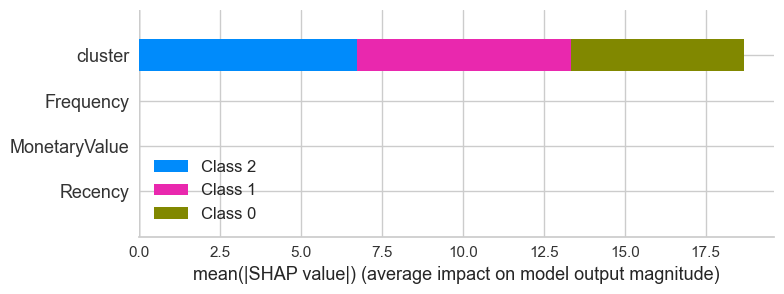

In [ ]:
from cv2 import exp
import lightgbm as lgb
from numpy import shape
import shap

clf_km = lgb.LGBMClassifier()

for col in rfm_scaled_no_outliers.columns[1:]:
    rfm_scaled_no_outliers[col] = rfm_scaled_no_outliers[col].astype('category')
    
clf_km.fit(rfm_scaled_no_outliers.iloc[:, 1:], clusters_predict)

explainer = shap.TreeExplainer(clf_km)
shape_values = explainer.shap_values(rfm_scaled_no_outliers.iloc[:, 1:])
shap.summary_plot(shape_values, rfm_scaled_no_outliers.iloc[:, 1:], plot_type="bar")